## Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

### Columns    

1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male
3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
4. children: Number of children covered by health insurance / Number of dependents
5. smoker: Smoking
6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7. charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


In [1]:
# importing necesary libraries 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data set

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using .info matter we can get information about our column names, number of values, data type. We can see that we have 3 columns with 'object' dtype so we will have to use an encoding technique to change data from categorical to numerical. We dont have null or missing values wich is perfect. 

In [4]:
# I use .isnull matter to check again if we got any null values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null in any columns. We can go further and use .describe to get deeper in our analisys. 

In [5]:
# I use the .describe method to see the stats for our contiuous data

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


count: all columns are equal that means that we don't have any missing values. 
mean: comparing mean and 50% raws we can find if we have skeweness in our data set. If mean is higher than 50% the data is skewed to the right if mean is less than 50% the data is skewed to the left. Here we dont have a big difference, not even in our tharget variable. 
std: is the Standard Deviation
min: is the smalles value in dataset
25%: is first quantile. 
50%: I mention above the corelation between 50% and mean
75%: if it is a big difference between 75% and max raws it indicates us that we have outliers in the data set. We can see that only 'bmi' column might have some outliers. We'll see that using boxplot graphs. 
max: indicates the biggest value in the data set and in comparasion with 75% raw can show us if there's any outliers. 

## EDA 

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


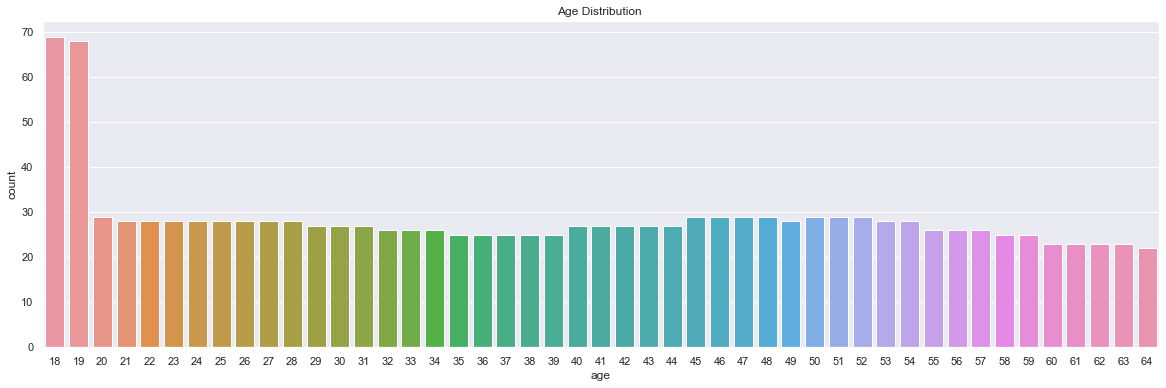

In [19]:
print(df['age'].value_counts())
plt.figure(figsize=(20,6))
sns.countplot(df['age'])
plt.title('Age Distribution ')
plt.show()

We can see that we have a lot of young people in the dataset with the age of 18 and 19. The data between the other ages is pretty equal. 

male      676
female    662
Name: sex, dtype: int64


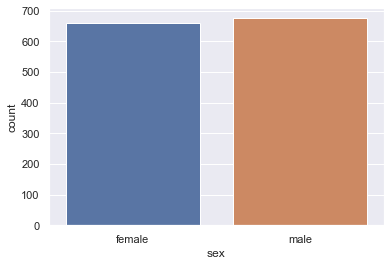

In [15]:
# I check the sex column

print(df['sex'].value_counts())
ax = sns.countplot(x = 'sex',data = df)
plt.show()

We can see that we have almost equal info about male and female in the data set. 

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


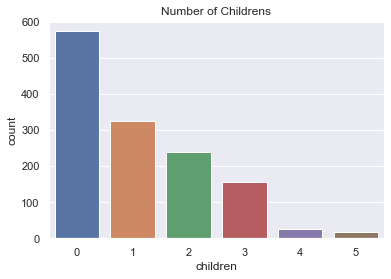

In [20]:
# I check the number of children

print(df['children'].value_counts())
sns.countplot(x='children',data=df)
plt.title('Number of Childrens')
plt.show()

Regarding the age of participants in the data set (18 and 19) it make sense to see that 40% of them don't have kids. We can check that. 

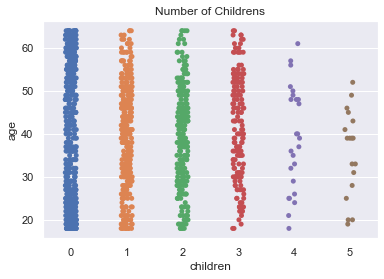

In [22]:
sns.stripplot(x='children', y = 'age',data=df)
plt.title('Number of Childrens by age')
plt.show()

We can see that our previous assumption wasn't accurate. There's no correlation between the age and number of children. Let's go further. 

no     1064
yes     274
Name: smoker, dtype: int64


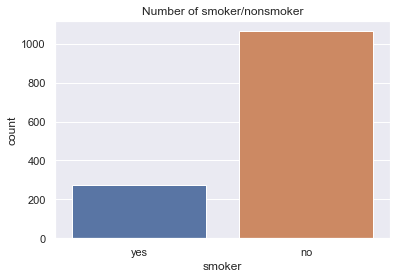

In [23]:
# I check the smokers and no smokers number 

print(df['smoker'].value_counts())
sns.countplot(x='smoker',data=df)
plt.title('Number of smoker/nonsmoker')
plt.show()

We can see that about 80% of the participants are non smoker. 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


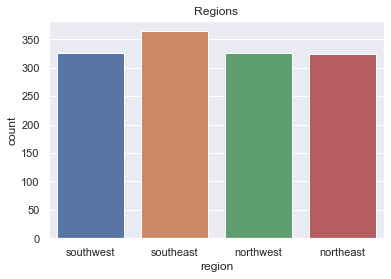

In [24]:
# I check the distribution based on region

print(df['region'].value_counts())
sns.countplot(x='region',data=df)
plt.title('Regions')
plt.show()

Here again our data is balanced. We don't have big differences between each region. 

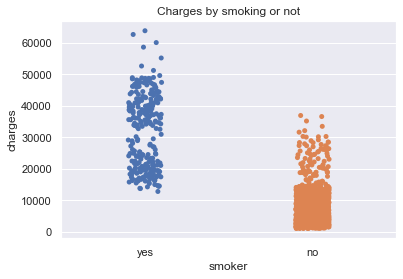

In [26]:
sns.stripplot(x='smoker', y = 'charges',data=df)
plt.title('Charges by smoking or not')
plt.show()

Using stripplot we can compare the charges regarding if the person is a smoker or not. Peoples that smoke pay a lot more than the one that don't. As we can see the 'no' column is condesend in the lower part of the chart. 

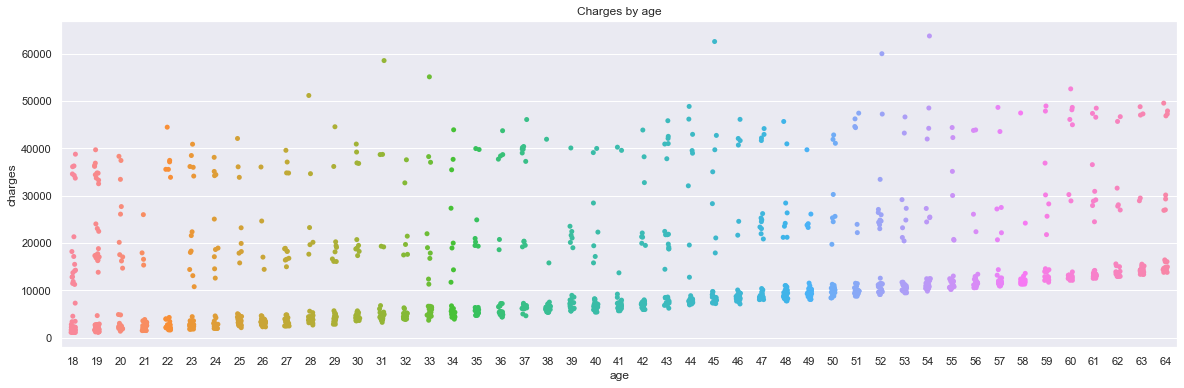

In [32]:
plt.figure(figsize=(20,6))
sns.stripplot(x='age', y = 'charges', data=df)
plt.title('Charges by age')
plt.show()

We can see the correlation between age and charges. The older it gets the bigger the charges. Lets see this graph with hue 'smoker. 

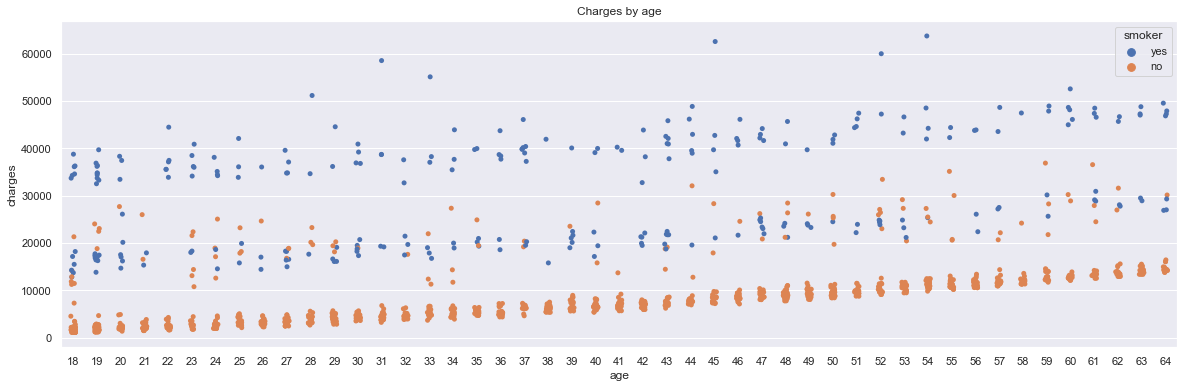

In [33]:
plt.figure(figsize=(20,6))
sns.stripplot(x='age', y = 'charges', hue = 'smoker', data=df)
plt.title('Charges by age')
plt.show()

We can see that all the smokers person are above 10k line and get's higher by age. 

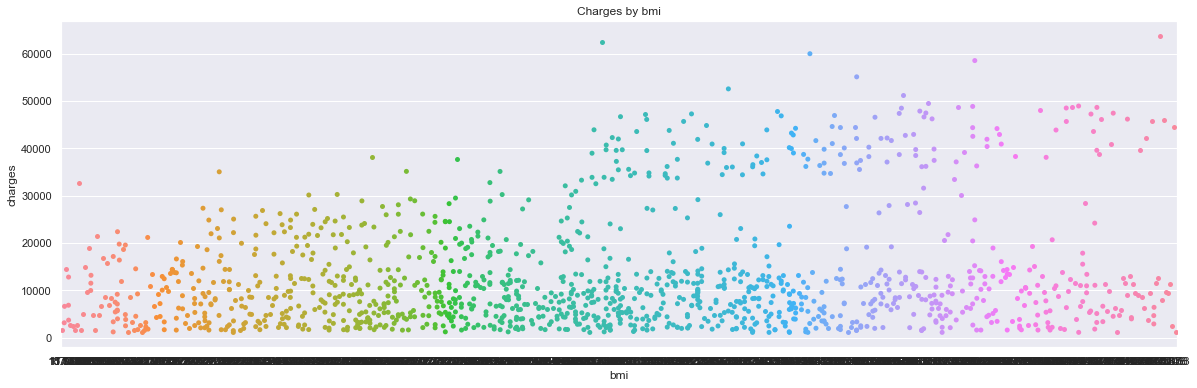

In [36]:
# I want to check the link between charges and bmi
plt.figure(figsize=(20,6))
sns.stripplot(x='bmi', y = 'charges', data=df)
plt.title('Charges by bmi')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

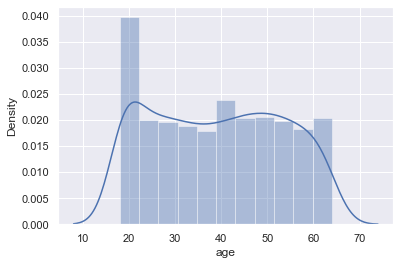

In [42]:
# I want to see the distribution for age

sns.distplot(df['age'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

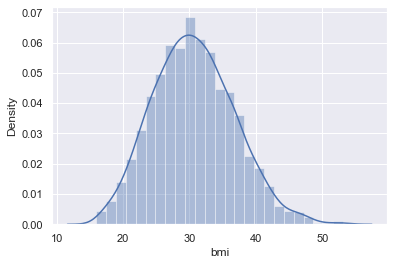

In [43]:
# I want to see the distribution for bmi

sns.distplot(df['bmi'])

The data follow a normal distribution. For 'bmi' looks like we have a little bit of skeweness to the right. Let's see that with boxplot. 

<AxesSubplot:xlabel='bmi'>

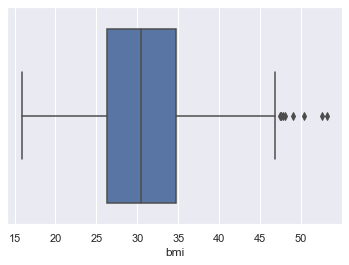

In [44]:
sns.boxplot(df['bmi'])

We have few outliers. Let's see how many. 

In [48]:
df.shape, df[df['bmi']<45].shape


((1338, 7), (1318, 7))

We lose only 20 data points which is not a big deal for our dataset even if it is small. It is a lot less than 10% of the dataset. 

In [66]:
df = df[df['bmi']<45]
df.shape

(1318, 7)

<AxesSubplot:xlabel='bmi'>

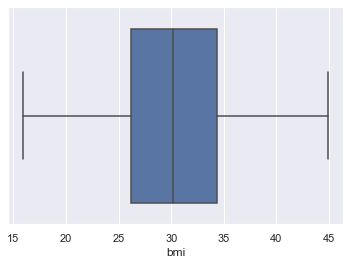

In [63]:
sns.boxplot(df['bmi'])

In [64]:
# encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


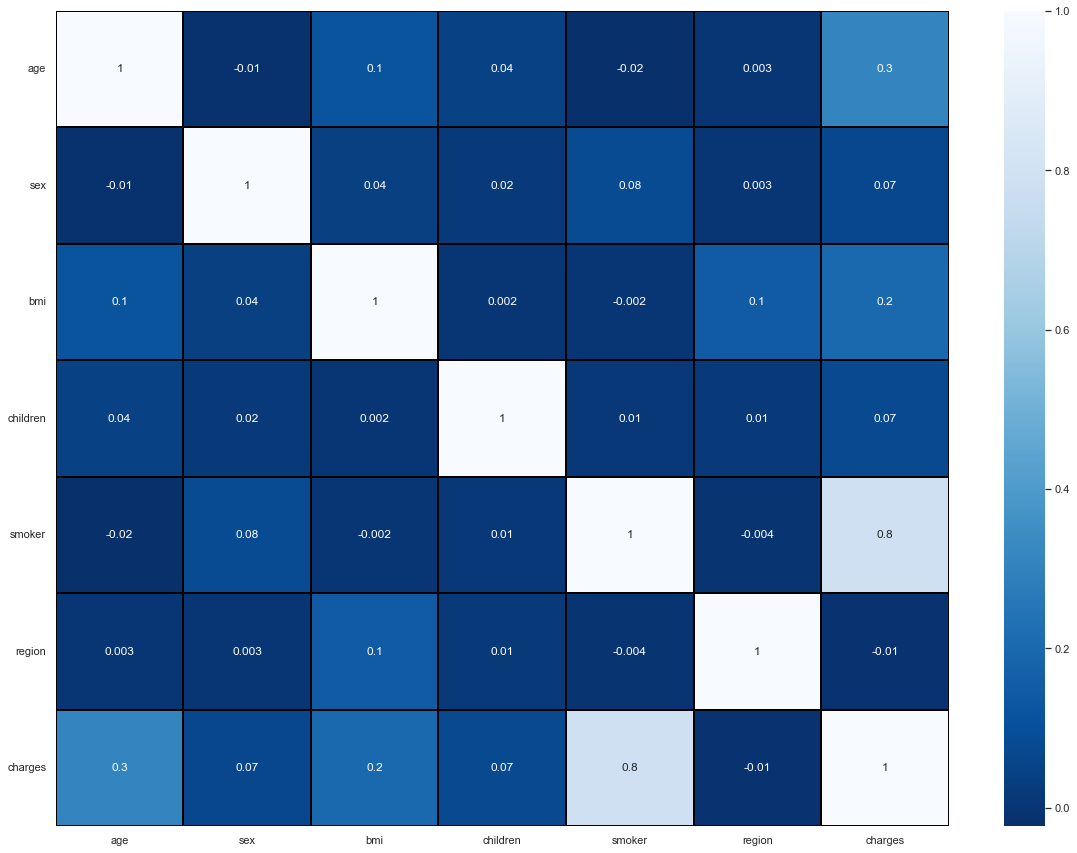

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

We can see that the features are a very low correlation between them. The strongest correlation with the target variable is 'smoker' feature with 80% after that is 'age' with only 30% and 'bmi' with 20%. '

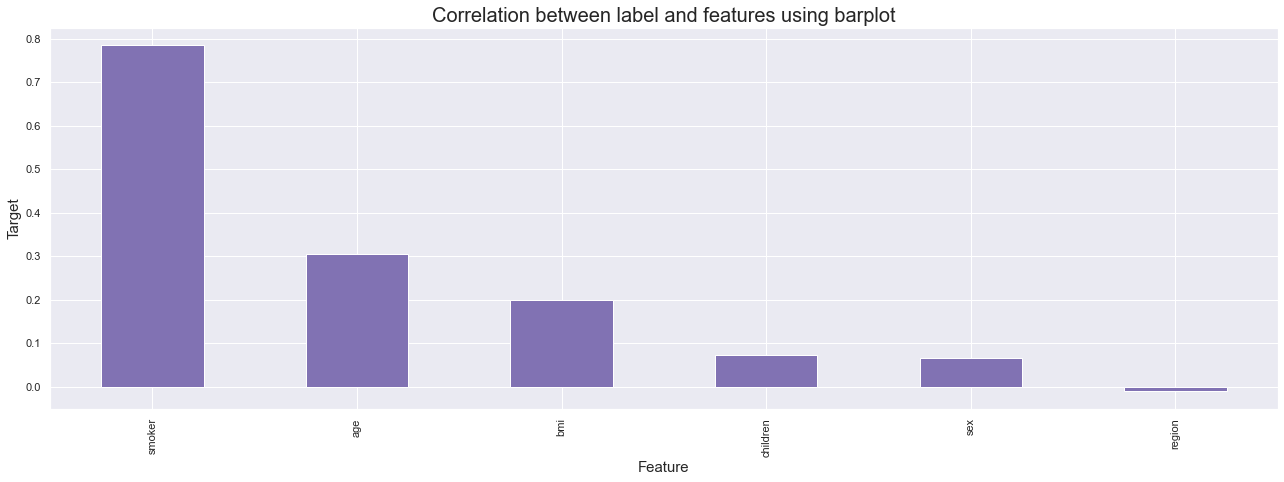

In [68]:
plt.figure(figsize = (22, 7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)
plt.show()

## Model building
### Separating the target from the features. 

In [69]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [70]:
# I print the shape of each just to be sure they are the same
print(x.shape)
print(y.shape)

(1318, 6)
(1318,)


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.435928,-1.007616,-0.434720,-0.904253,1.974748,1.346376
1,-1.507001,0.992441,0.583094,-0.074305,-0.506394,0.444229
2,-0.796264,0.992441,0.449582,1.585591,-0.506394,0.444229
3,-0.440895,0.992441,-1.335493,-0.904253,-0.506394,-0.457918
4,-0.511969,0.992441,-0.264795,-0.904253,-0.506394,-0.457918
...,...,...,...,...,...,...
1313,0.767360,0.992441,0.097595,1.585591,-0.506394,-0.457918
1314,-1.507001,-1.007616,0.262318,-0.904253,-0.506394,-1.360066
1315,-1.507001,-1.007616,1.117143,-0.904253,-0.506394,0.444229
1316,-1.293780,-1.007616,-0.798844,-0.904253,-0.506394,1.346376


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 100)

In [98]:
maxAccu = 0
maxRS = 0
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Maximum r2 score is ', maxAccu, ' on Random_state', maxRS)

Maximum r2 score is  0.8061128912734697  on Random_state 62


In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = maxRS)

In [100]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score:', r2_score(y_test, pred_LR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score: 0.7905667652736456
R2_score on training Data: 73.83966870378903
Mean Absolute Error:- 4052.0966910106345
Mean Squared Error:- 32351712.427550923
Root Mean Squared Error:- 5687.856575859743


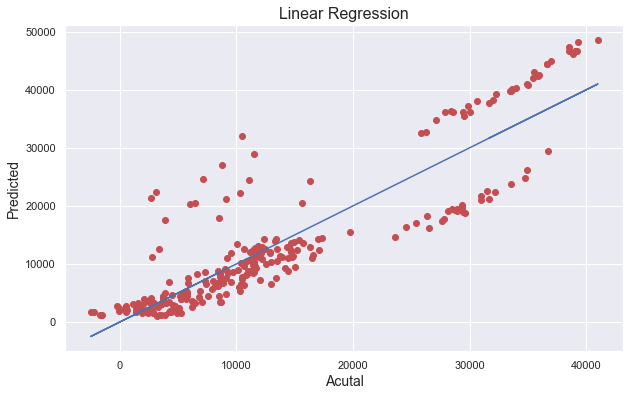

In [101]:
plt.figure(figsize = (10,6))
plt.scatter(x=pred_LR, y = y_test, color = 'r')
plt.plot(pred_LR, pred_LR, color = 'b')
plt.xlabel('Acutal', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Linear Regression', fontsize = 16)
plt.show()

In [102]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score:', r2_score(y_test, pred_RFR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score: 0.8407154398970537
R2_score on training Data: 97.61794671698364
Mean Absolute Error:- 2970.642230635151
Mean Squared Error:- 24605112.408890363
Root Mean Squared Error:- 4960.354060839847


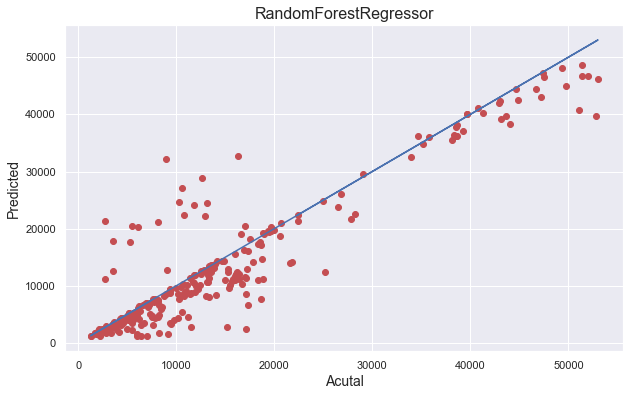

In [111]:
plt.figure(figsize = (10,6))
plt.scatter(x=pred_RFR, y = y_test, color = 'r')
plt.plot(pred_RFR, pred_RFR, color = 'b')
plt.xlabel('Acutal', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('RandomForestRegressor', fontsize = 16)
plt.show()

In [104]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score:', r2_score(y_test, pred_knn))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_knn))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score: 0.8512320131570303
R2_score on training Data: 85.90929161431426
Mean Absolute Error:- 2887.0308720378785
Mean Squared Error:- 22980589.18422365
Root Mean Squared Error:- 4793.8073787151325


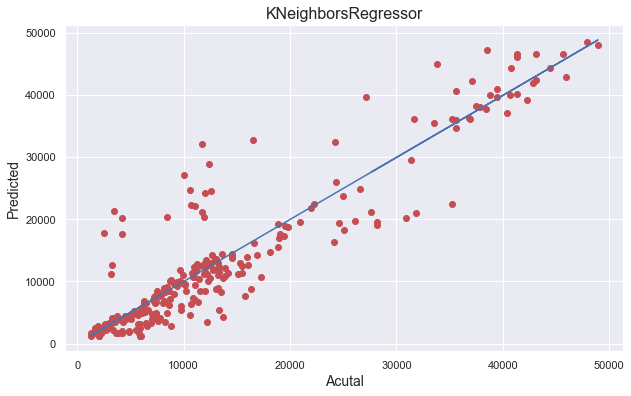

In [110]:
plt.figure(figsize = (10,6))
plt.scatter(x=pred_knn, y = y_test, color = 'r')
plt.plot(pred_knn, pred_knn, color = 'b')
plt.xlabel('Acutal', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('KNeighborsRegressor', fontsize = 16)
plt.show()

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score:', r2_score(y_test, pred_GBR)*100)
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_GBR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score: 88.64595756512324
R2_score on training Data: 89.83579915586455
Mean Absolute Error:- 2531.16109265583
Mean Squared Error:- 17538893.30044904
Root Mean Squared Error:- 4187.946191207457


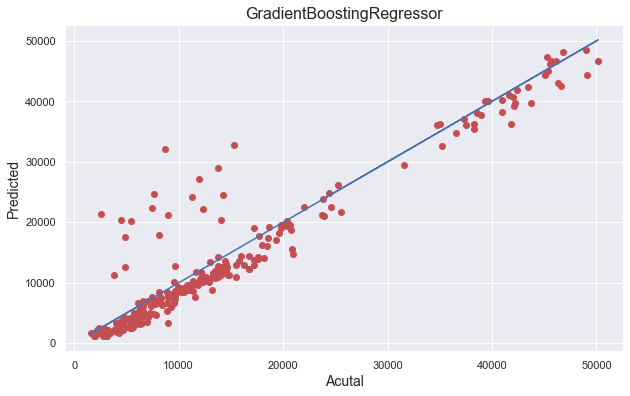

In [112]:
plt.figure(figsize = (10,6))
plt.scatter(x=pred_GBR, y = y_test, color = 'r')
plt.plot(pred_GBR, pred_GBR, color = 'b')
plt.xlabel('Acutal', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('GradientBoostingRegressor', fontsize = 16)
plt.show()

In [113]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2_score:', r2_score(y_test, pred_lasso))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_lasso)))


R2_score: 0.79057750652019
R2_score on training Data: 73.8396643053717
Mean Absolute Error:- 4051.884722161105
Mean Squared Error:- 32350053.198442545
Root Mean Squared Error:- 5687.710716838766


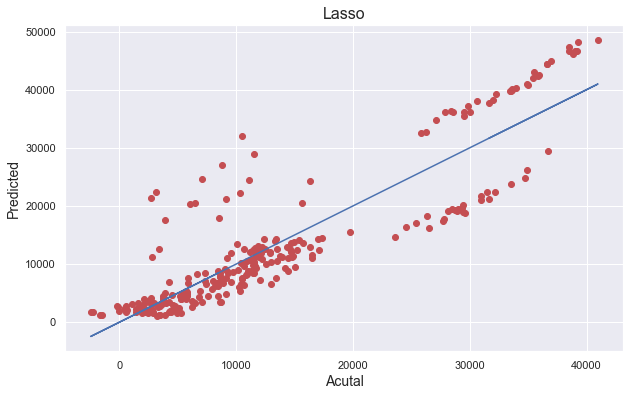

In [114]:
plt.figure(figsize = (10,6))
plt.scatter(x=pred_lasso, y = y_test, color = 'r')
plt.plot(pred_lasso, pred_lasso, color = 'b')
plt.xlabel('Acutal', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Lasso', fontsize = 16)
plt.show()

In [115]:
rd = Ridge()
rd.fit(x_train, y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score:', r2_score(y_test, pred_rd))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_rd))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score: 0.7905595208560829
R2_score on training Data: 73.8395977986218
Mean Absolute Error:- 4053.4729704023857
Mean Squared Error:- 32352831.492125362
Root Mean Squared Error:- 5687.954948144839


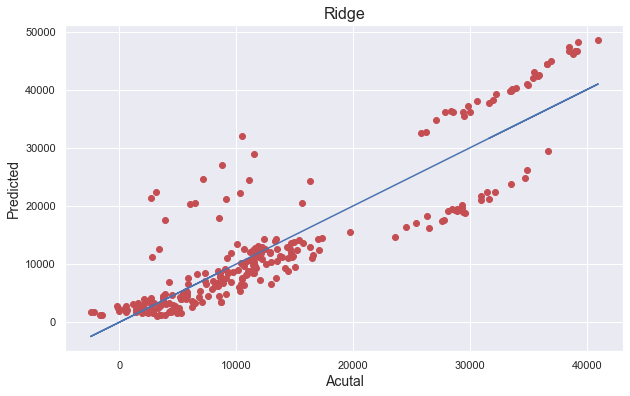

In [116]:
plt.figure(figsize = (10,6))
plt.scatter(x=pred_rd, y = y_test, color = 'r')
plt.plot(pred_rd, pred_rd, color = 'b')
plt.xlabel('Acutal', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Ridge', fontsize = 16)
plt.show()

In [117]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print('R2_score:', r2_score(y_test, pred_dtr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_dtr))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score: 0.6409325883349524
R2_score on training Data: 100.0
Mean Absolute Error:- 3808.435758295455
Mean Squared Error:- 55466104.31467919
Root Mean Squared Error:- 7447.556935981032


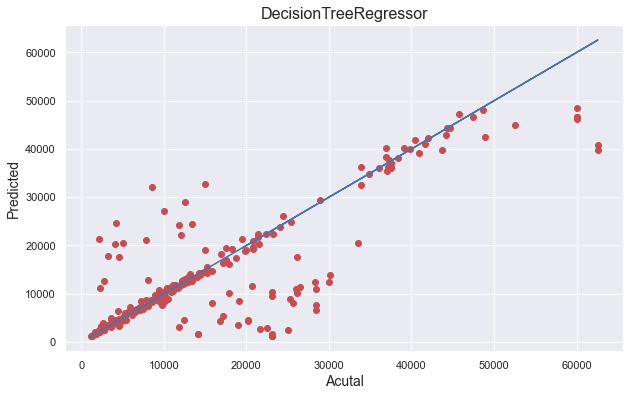

In [118]:
plt.figure(figsize = (10,6))
plt.scatter(x=pred_dtr, y = y_test, color = 'r')
plt.plot(pred_dtr, pred_dtr, color = 'b')
plt.xlabel('Acutal', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('DecisionTreeRegressor', fontsize = 16)
plt.show()

In [120]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)
print('R2_score:', r2_score(y_test, pred_etr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_etr))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_etr))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_etr)))

R2_score: 0.808229767562311
R2_score on training Data: 100.0
Mean Absolute Error:- 3036.8463005272347
Mean Squared Error:- 29623261.179606885
Root Mean Squared Error:- 5442.725528593821


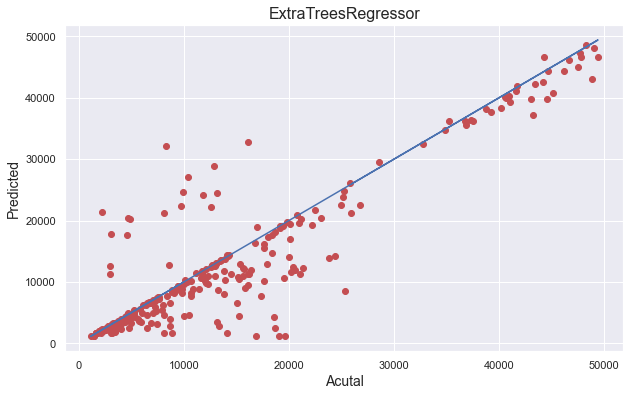

In [121]:
plt.figure(figsize = (10,6))
plt.scatter(x=pred_etr, y = y_test, color = 'r')
plt.plot(pred_etr, pred_etr, color = 'b')
plt.xlabel('Acutal', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('ExtraTreesRegressor', fontsize = 16)
plt.show()

From all the models that we tested the best performance was given by GradientBoostingRegressor with 88%. We will looking for the best params for the model and if the performance is improved. 

In [128]:
from sklearn.model_selection import GridSearchCV

param = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'], 
         'learning_rate':[1,10,40,500,1000],
        'criterion':['friedman_mse', 'squared_error'],
        'min_samples_leaf':[0.1,0.01,0.2,0.45,0.9],
        'random_state':[1,4,10,20]}

gscv = GridSearchCV(GradientBoostingRegressor(),param, cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [1, 10, 40, 500, 1000],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'min_samples_leaf': [0.1, 0.01, 0.2, 0.45, 0.9],
                         'random_state': [1, 4, 10, 20]})

In [129]:
gscv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 1,
 'loss': 'huber',
 'min_samples_leaf': 0.1,
 'random_state': 1}

We get the best parameters for our model and now we can build the final model. 

In [130]:
Model = GradientBoostingRegressor(loss = 'huber', learning_rate = 1, criterion = 'friedman_mse', min_samples_leaf = 0.1, random_state =1 )

In [131]:
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score:', r2_score(y_test,pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.8935775260282438
Mean Absolute Error: 1814.6875655860451
Mean Squared Error: 16439364.450734569
Root Mean Squared Error: 4054.5486124517693


In [132]:
import pickle 
filename = 'Medical_Cost_Insurance_Prediction.pkl'
pickle.dump(Model, open(filename, 'wb'))

In [133]:
loaded_model = pickle.load(open('Medical_Cost_Insurance_Prediction.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

89.35775260282438


In [ ]:
input_data = (28,0,22.8,3,0,2)

#changing it to numpy array
input_data_as_array = np.asarray(input_data)

#reshapping the data
input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print("The person will get insurance money = ",prediction[0])